# Recursion in Morpheus

# Preliminaries

## Imports

In [1]:
import os
import sys
import numpy as np
import pprint


from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = dirname(os.getcwd())
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus import Morpheus
from morpheus.tests import (default_dataset,
                            default_m_list_for_mercs,
                            random_m_list_for_mercs)

from morpheus.algo.inference import get_predict

# Visuals
from morpheus.graph import to_dot
from morpheus.visuals import show_diagram
from morpheus.graph.network import *

from morpheus.composition import o as ω
from morpheus.composition import x as χ

# Ipython things
from IPython.display import Image, display
from IPython.core.display import HTML 

pp = pprint.PrettyPrinter(indent=4)

## Methods

## General Variables

# Prepare sandbox

Train a morpheus on a dataset and extract an interesting composite model.


                We have selected    2 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-34'}, {'f-56'}]
                


                We have selected    5 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-02'}, {'f-22'}, {'f-33'}, {'f-52'}, {'f-67'}]
                

AVL DESC: {0, 1, 6}
AVL DESC: {0, 1, 3, 4, 6}
dict_keys(['d-01', 'd-06'])
dict_keys(['d-01', 'd-06', 'f-34', 'd-04'])


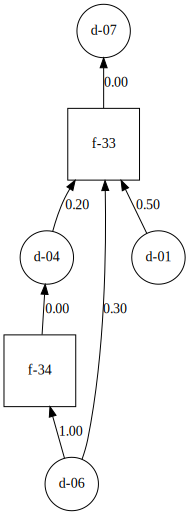

In [2]:
m = Morpheus(random_state=802,
             prediction_algorithm='it',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_targets=1,
             nb_iterations=10,
             fraction_missing=0.4,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

q_code = np.array([0,0,-1,-1,-1,-1,0,1])

m.fit(df_train.values)
Y = m.predict(df_test.values[:, :], q_code=q_code)
m.show_q_diagram(fi=True)

In [3]:
Y[:10,:]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [4]:
q_compose = m.q_compose

In [5]:
dir(q_compose)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'desc_ids',
 'extract_feature_importances',
 'feature_importances_',
 'predict',
 'targ_ids']

In [6]:
q_compose.desc_ids

[1, 6]

In [7]:
q_compose.targ_ids

[7]

In [8]:
cg = model_to_graph(q_compose, idx=99)

In [9]:
m.g_list.append(cg)

In [10]:
m.m_list.append(q_compose)

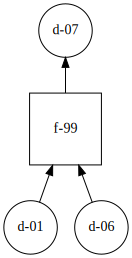

In [11]:
show_diagram(m.g_list[-1])


                We have selected    3 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-34'}, {'f-56'}, {'f-99'}]
                

AVL DESC: {0, 1, 6}
dict_keys(['d-01', 'd-06'])


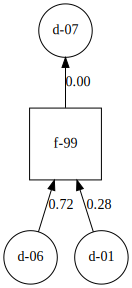

In [13]:
Y2 = m.predict(df_test.values[:, :], q_code=q_code)
m.show_q_diagram(fi=True)

In [ ]:
Y-Y2